# First Project: Analisis Sentiment

- Nama : Davi Sulaiman
- ID Dicoding : MC189D5Y0317

## Install Library

In [90]:
!pip install pandas numpy matplotlib seaborn wordcloud
!pip install nltk Sastrawi
!pip install scikit-learn
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Library

In [141]:
# Pustaka untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Pemrosesan teks
import re
import string
import json
import requests
import pickle
import csv
from io import StringIO
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download as nltk_unduh
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Mengunduh dependensi NLTK
nltk_unduh('punkt')
nltk_unduh('punkt_tab')
nltk_unduh('stopwords')

# Pustaka untuk pembelajaran mesin
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

# Pustaka untuk pembelajaran mendalam
# Pustaka untuk pembelajaran mendalam
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout, Flatten, GRU,
    SpatialDropout1D, Conv1D, MaxPooling1D, GlobalAveragePooling1D
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import math

# Menonaktifkan peringatan sistem
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Dataset

### Melakukan read dataset dan menyimpannya di variabel data

In [92]:
df = pd.read_csv("./Dataset/ulasan_gojek.csv")

### Menampilkan lima data teratas dari dataset

In [93]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,595da86c-acc1-4a64-ae43-90ff85eaf53d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,terlalu terlalu terlalu... apk yg tidak bisa di percaya. kuota cepat abis minta update terus. tp bug tmbah banyak. hp jd lelet !!!.. kok bisa nyuri data pribadi ya... diliat dari apk yg terus berjln dilatar belakang dan terus mengirim data. tp g tau data ap yg dikirim ?? wah wah wah... bahaya bobol bisa atm wkwkwk,1,1,4.31.1,2022-04-21 20:37:07,"Hai, mohon maaf atas kendala yang kamu alami. Mengenai kendala tersebut, silakan laporkan melalui email ke customerservice@go-jek.com dengan melampirkan kode psr-22-112-0133-51987 pada subject email agar tim kami bisa bantu cek lebih lanjut. ^Viska",2022-04-22 08:33:31,4.31.1
1,9f871c14-7d44-4f0d-8cbe-9904d42cf3b6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Gak usah pasang tarif tarif hemat, soalnya para driver nya gak ada yang mau ambil orderan, dengan alasan gak sesuai dengan harga, dan bahasa mereka merendahkan costumer, karena pesen yg paket hemat, trs knp di adain paket hemat, yg salah yg punya aplikasi lah, pengen kasih promo tapi para driver nya gak mau.",1,295,5.14.2,2025-03-21 21:44:12,"Hai Kak Evi, mohon maaf atas ketidaknyamanannya. Laporan yang kamu sampaikan akan menjadi masukan bagi kami untuk terus meningkatkan kualitas layanan kami ke depannya. Jika kamu memiliki pertanyaan atau kendala lainnya, silakan kunjungi menu Bantuan di aplikasi Gojek kamu. ^Maura",2025-03-21 22:05:01,5.14.2
2,825e4595-c073-4388-8229-415e372b6c01,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"tinggal 2menit lg driver sampe di lokasi tiba-tiba dibatalin otomatis sama aplikasinya!!! tau tau udah mencari driver yg baru, dan ini kejadian gak sekali dua kali tapi sering! map jg sering di arahin ke jalan yg sulit di lewati mobil!! alhasil banyak yg batalin! komplain via chat cuma bot doang, Kita yg mo complain gak bisa ketik sendiri masalahnya, mo complain lewat email atau tlp jg gak bisa!!! aplikasi gak niat terima komplain!!!",1,135,5.14.2,2025-03-26 07:35:56,"Hai Kak Wahyu, mohon maaf atas ketidaknyamanannya. Laporan yang kamu sampaikan akan menjadi masukan bagi kami untuk terus meningkatkan kualitas layanan kami ke depannya. Jika masih berkendala, silakan laporkan ke email customerservice@gojek.com dengan kode psr-25-085-0426-36402 di subject email. Kami tunggu detail laporan kamu ya. ^Melisa",2025-03-26 11:26:47,5.14.2
3,46c3b900-0136-4fbf-91a0-c3f73d661fac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"sebagai pengguna lama baru kali ini saya kecewa sama aplikasi GO-JEK terutama gocar... sebelumnya saya tidak pernah ada masalah walau kadang tidak sesuai harapan dan tetap saya kasih bintang lima dan tip. tp ini sudah pakai prioritas, tetap dicancel driver dgn alasan jauh (pdhl di maps deket), harga ga sesuai (kan bukan saya yg kasih harga jg), driver yg beneran jauh posisinya (pdhl prioritas harusnya yg paling dekat)... akhirnya adu lama2an cancel order... makan waktu... makan ati... hiks...",1,4,5.14.2,2025-04-07 14:25:32,"Hai Kak Harliani, mohon maaf atas ketidaknyamanannya. Laporan yang kamu sampaikan akan menjadi masukan bagi kami untuk terus meningkatkan kualitas layanan kami ke depannya. Kemudian terkait keluhannya, silakan laporkan melalui menu Bantuan di aplikasi Gojek dengan mengetik ""Driver membatalkan pesanan saya"" pada kolom pencarian ya. ^Melisa",2025-04-07 15:59:35,5.14.2
4,ca02be83-772a-480a-a36c-7363e8176146,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx8

### Menampilkan lima data terakhir dari dataset

In [94]:
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
29995,4c75d2a6-4037-46d0-beb1-a2d0025e74a8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sebaiknya gofood memberi waktu konfirmasi untuk pesanan di penjual star, karena restoran langsung konfirmasi ga bisa kami cancel. Sebaiknya , kasih delay untuk konfirmasi setidaknya 2 kali konfirmasi , supaya ga ada yg salah dan masih bisa kami revisi",1,0,NaN,2021-10-25 14:50:38,"Hai Andreas, terima kasih atas ulasanmu. Kritik dan saran yang kamu berikan akan menjadi masukan bagi kami untuk terus meningkatkan kualitas layanan kami ke depannya. Jika kamu memiliki pertanyaan atau kendala lainnya, silakan kunjungi menu Bantuan di aplikasi Gojek kamu. ^Viska",2021-10-26 08:07:39,NaN
29996,5de7adc1-fda7-4f23-a8f2-9a1f324b84a0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Ternyata beli langsung di pinggir jalan lebih murah daripada online. Terkejut ternyata nasi ikan teri sambal cuma 6 ribu, di aplikasi online 15 ribu. Belum ongkir+tips buat driver. Padahal cuma 200 meter dari rumah. Kalau mau hemat dan cepat, jangan malas jalan kaki.",3,1,4.53.1,2023-07-02 07:19:52,"Hai Anas, apabila kamu mengalami kendala terkait layanan Gojek, silakan laporkan melalui menu Bantuan di aplikasi Gojek agar tim kami bisa bantu cek ya. Kami tunggu detail permasalahannya ya. ^Meta",2023-07-04 12:07:56,4.53.1
29997,d8b614e2-851e-40f2-bd61-1a7ac231bc66,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"apk gk jelas, pesanan makanan 1 jam lebih status mencari driver, mau batalin gk bisa jd nunggu terus tanpa kepastian!!! uda mau 2 jam ini.",1,0,NaN,2023-11-04 22:12:56,"Mohon maaf atas ketidaknyamanannya, Kak. Kesulitan mendapatkan driver bisa terjadi karena meningkatnya jumlah pesanan di jam sibuk, atau tidak ada driver di dekat titik penjemputan. Mohon menunggu beberapa saat dan coba kembali, ya. Jika ada pertanyaan lain, silakan kunjungi menu Bantuan pada aplikasi Gojek-mu, ya. ^Oca",2023-11-05 09:08:47,NaN
29998,4ebefe60-689e-442b-b5a7-637279b61633,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Tlong di perbaiki lagi, saya tidak meng cancel oredran, tpi di aplikasi saya saya cancel orderan, trs ada notifikasi orderan anda telah dibatalkan tpi di aplikasi driver saya tidak ada orderan masuk 😭",3,0,NaN,2019-07-27 07:18:30,NaN,NaN,NaN
29999,fe35bbd2-efd2-489c-b949-e7892ad1c413,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Saya suka dengan gojek dari dulu karna pelayanan drivernya sat set gak pernah cancel selalu bisa, tapi sekarang drivernya itaitu banyak alesan apalagi pas hujan aduh parah gak ada driver, apa munkin gak ada bonus apa karna tarif murah yang diperoleh bapak drivernya",3,0,4.44.1,2022-06-12 00:59:42,"Hai, terima kasih atas ulasanmu. Kritik dan saran yang kamu berikan akan menjadi masukan bagi kami untuk terus meningkatkan kualitas layanan kami ke depannya. Jika kamu memiliki pertanyaan atau kendala lainnya, silakan kunjungi menu Bantuan di aplikasi Gojek kamu. ^Agum",2022-06-13 13:22:11,4.44.1


### Menampilkan informasi dari dataset seperti jumlah baris, kolom, dan tipe data

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              30000 non-null  object
 1   userName              30000 non-null  object
 2   userImage             30000 non-null  object
 3   content               30000 non-null  object
 4   score                 30000 non-null  int64 
 5   thumbsUpCount         30000 non-null  int64 
 6   reviewCreatedVersion  24868 non-null  object
 7   at                    30000 non-null  object
 8   replyContent          14319 non-null  object
 9   repliedAt             14319 non-null  object
 10  appVersion            24868 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


# Data Preprosseing 

##  **1. Membersihkan Teks (Cleaning Text)** 
### Fungsi: `cleaning_text(text)`

### Tujuan:
Membersihkan teks dari:
- Mention `@username`
- Hashtag `#tagar`
- Retweet `RT`
- Link
- Angka
- Karakter non-alfanumerik
- Tanda baca
- Spasi berlebih



In [96]:
# Membersihkan teks
def cleaning_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)              # Hapus mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)              # Hapus hashtag
    text = re.sub(r'RT[\s]', '', text)                      # Hapus RT
    text = re.sub(r"http\S+", '', text)                     # Hapus URL
    text = re.sub(r'[0-9]+', '', text)                      # Hapus angka
    text = text.replace('\n', ' ')                          # Ganti newline dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = text.strip()                                     # Hapus spasi di awal dan akhir
    return text

##  **2. Case Folding** 
### Fungsi: `casefolding_text(text)`

### Tujuan:
Mengubah semua huruf dalam teks menjadi huruf kecil.


In [97]:
# Casefolding (ubah jadi huruf kecil)
def casefolding_text(text):
    return text.lower()

In [98]:
# Gabungkan cleaning dan casefolding
def proses_teks(text):
    text = cleaning_text(text)
    text = casefolding_text(text)
    return text


##  **3. Stemming**
### Fungsi: `stemming_text(text)`

### Tujuan:
Mengubah kata-kata ke bentuk dasarnya (root form) menggunakan **Sastrawi**.


In [99]:
# Ganti kata slang
slangwords = {
    "@": "di", "yg": "yang", "abis": "habis", "gak": "tidak", "banget": "sangat", "bgt": "sangat",
    "kmrn": "kemarin", "tdk": "tidak", "dr": "dari", "tp": "tapi", "trs": "terus", "jd": "jadi",
    "sm": "sama", "aja": "saja", "mauu": "mau", "udh": "sudah", "blm": "belum", "jg": "juga",
    "klo": "kalau", "lg": "lagi", "ngga": "tidak", "makasih": "terima kasih", "mantul": "mantap betul",
    "cepet": "cepat", "aneh": "tidak biasa", "orderan": "pesanan", "ojol": "ojek online",
    "driver": "pengemudi", "ngebut": "melaju cepat", "cancel": "batal", "topup": "isi ulang",
    "gopay": "saldo Gojek", "gocar": "layanan mobil Gojek", "goride": "layanan motor Gojek",
    "gosend": "layanan pengiriman Gojek"
}
def perbaiki_kata_slang(text):
    words = text.split()
    fixed_words = [slangwords.get(word.lower(), word) for word in words]
    return ' '.join(fixed_words)

##  **4. Tokenisasi** 
### Fungsi: `tokenizing_text(text)`

### Tujuan:
Memecah kalimat menjadi daftar kata (tokens).


In [100]:
# Tokenisasi
def tokenisasi_teks(text):
    return word_tokenize(text)

##  **5. Filter Stopwords** 
### Fungsi: `filter_stopwords(tokens)`

### Tujuan:
Menghapus kata umum (stopwords) dalam Bahasa Indonesia, Inggris, dan tambahan kata-kata tidak bermakna yang sering muncul.


In [101]:
# Hapus stopwords
def filter_stopwords(tokens):
    list_stopwords = set(stopwords.words('indonesian'))
    list_stopwords.update(stopwords.words('english'))
    list_stopwords.update([
        'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya',
        'gaa', 'loh', 'kah', 'woi', 'woii', 'woy'
    ])
    return [token for token in tokens if token not in list_stopwords]

##  **6. Menggabungkan Token** 
### Fungsi: `join_tokens(tokens)`

### Tujuan:
Menggabungkan list kata (token) kembali menjadi kalimat utuh.



In [102]:
# Gabungkan kembali ke kalimat
def gabungkan_ke_kalimat(tokens):
    return ' '.join(tokens)

## **7. Proses Preprocessing pada DataFrame** 


In [103]:
# Bersihkan teks dan simpan hasilnya di kolom 'clean_text'
df['clean_text'] = df['content'].apply(proses_teks)

# Ganti kata slang dan simpan di 'text_slangwords'
df['text_slangwords'] = df['clean_text'].apply(perbaiki_kata_slang)

# Tokenisasi teks dan simpan di 'text_tokenizing'
df['text_tokenizing'] = df['text_slangwords'].apply(tokenisasi_teks)

# Hapus stopwords dan simpan hasilnya di 'text_stopword'
df['text_stopword'] = df['text_tokenizing'].apply(filter_stopwords)

# Gabungkan token menjadi kalimat dan simpan di 'clean_content'
df['clean_content'] = df['text_stopword'].apply(gabungkan_ke_kalimat)


## **8. Memuat Lexicon Sentimen (Positive & Negative Word Lists)** 


In [104]:
# Function to safely fetch lexicon data from a given URL
def fetch_lexicon(url):
    """
    Mengunduh dan mengembalikan sekumpulan kata dari URL yang diberikan.
    Menyaring baris kosong dan memangkas spasi.
    
    Parameter:
    url (str): URL ke file leksikon
    
    Hasil yang dikembalikan:
    set: Satu set kata yang telah dibersihkan dari leksikon
    
    """
    try:
        response = requests.get(url)
        response.raise_for_status()
        return {word.strip() for word in response.text.splitlines() if word.strip()}
    except requests.RequestException as e:
        print(f"Failed to fetch data from {url}: {e}")
        return set()

# Lexicon URLs
lexicon_urls = {
    "positive": "https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/positive.txt",
    "negative": "https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/negative.txt"
}

# Load lexicons
positive_lexicon = fetch_lexicon(lexicon_urls["positive"])
negative_lexicon = fetch_lexicon(lexicon_urls["negative"])


## 9. Mendefinisikan  fungsi untuk menghitung polaritas sentimen

###  Function: `get_sentiment(tokens)`
Fungsi ini digunakan untuk menentukan **skor polaritas** dan **label sentimen** berdasarkan daftar kata positif dan negatif (*lexicon-based sentiment analysis*).


In [105]:
# Function to determine sentiment using lexicons
def get_sentiment(tokens):
    score = sum(
        (1 if word in positive_lexicon else -1 if word in negative_lexicon else 0)
        for word in tokens
    )

    sentiment = 'positive' if score > 0 else 'negative' if score < 0 else 'neutral'
    return score, sentiment

# Apply sentiment analysis to the 'text_stopword' column
sentiment_results = df['text_stopword'].apply(get_sentiment)
df['sentiment_score'], df['sentiment'] = zip(*sentiment_results)

# Display sentiment distribution
print(df['sentiment'].value_counts())


sentiment
positive    12200
negative     9114
neutral      8686
Name: count, dtype: int64


# Data Understanding

## Menampilkan distribusi sentiment dengan pie chart

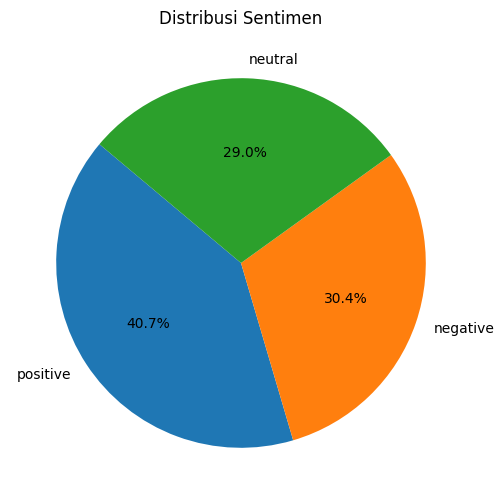

In [106]:
# Pie chart distribusi sentimen
df['sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    figsize=(6, 6),
    title='Distribusi Sentimen'
)

plt.ylabel('')  # Hilangkan label y untuk tampilan lebih rapi
plt.show()


## Menampilkan distribusi sentiment_score dengan histogram

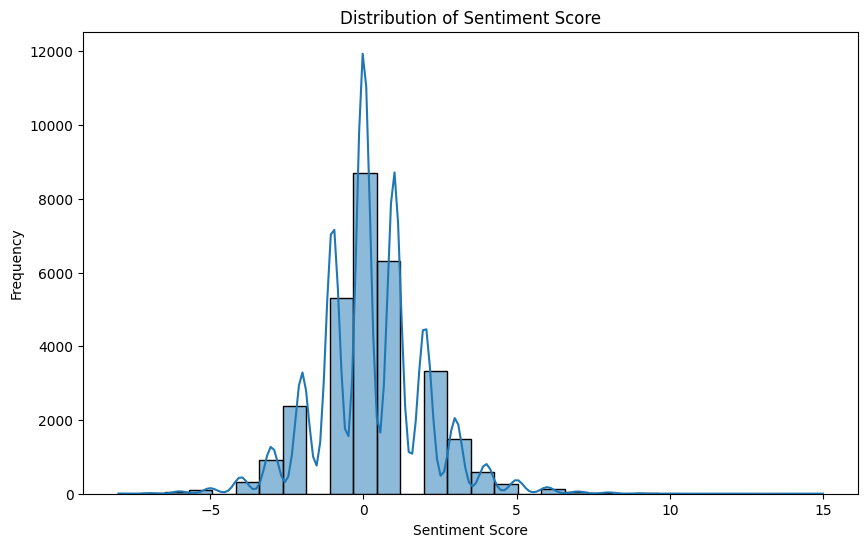

In [107]:
# Menampilkan distribusi polarity_score dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## Membuat wordcloud dari dataset tanpa melihat label

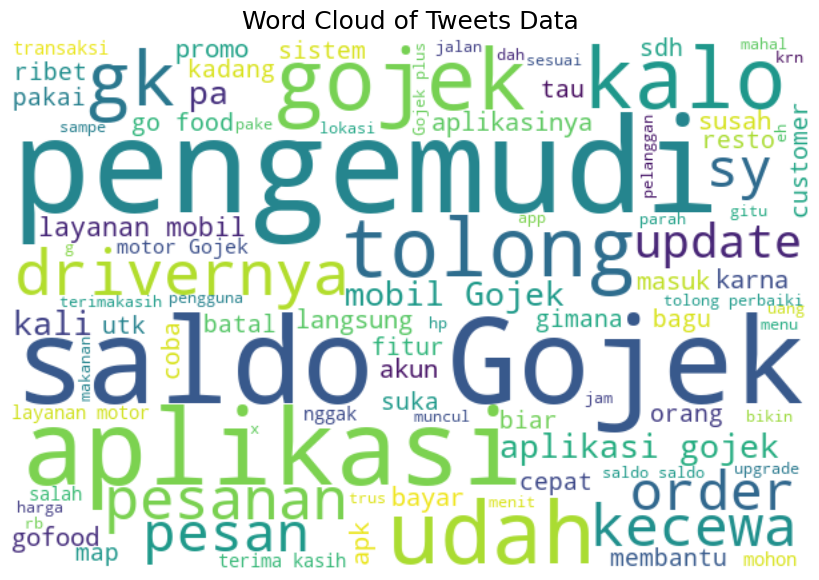

In [108]:
# Gabungkan semua kata dari kolom 'text_stopword' menjadi satu string
all_words = ' '.join([' '.join(tweet) for tweet in df['text_stopword']])

# Buat objek WordCloud
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10
).generate(all_words)

# Tampilkan WordCloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets Data', fontsize=18)
plt.axis('off')  # Sembunyikan axis
plt.tight_layout(pad=0)
plt.show()


## Membuat wordcloud dari dataset label positif

In [109]:
# Membuat dataframe untuk wordcloud positive
pd.set_option('display.max_colwidth', 3000)

positive_tweets = df[df['sentiment'] == 'positive']
positive_tweets = positive_tweets[['clean_content', 'sentiment_score', 'sentiment','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='sentiment_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

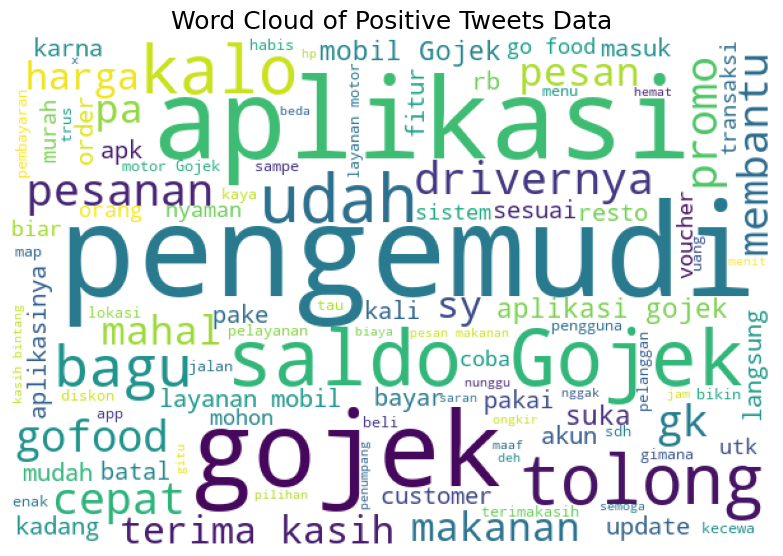

In [110]:
# Menampilkan wordcloud untuk label positive
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

## Membuat wordcloud dari dataset label negative

In [111]:
# Membuat dataframe untuk wordcloud negative
pd.set_option('display.max_colwidth', 3000)

negative_tweets = df[df['sentiment'] == 'negative']
negative_tweets = negative_tweets[['clean_content', 'sentiment_score', 'sentiment','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='sentiment_score', ascending=False)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

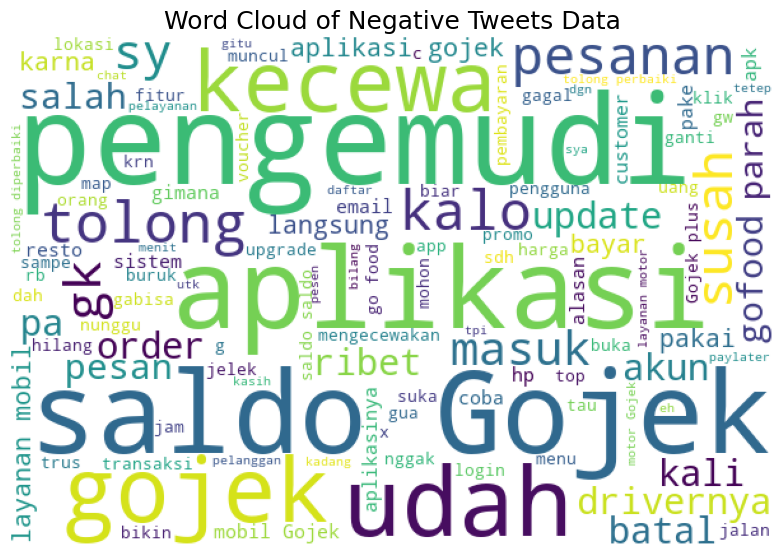

In [112]:
# Menampilkan wordcloud untuk label negative
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

## Membuat wordcloud dari dataset label neutral

In [113]:
# Membuat dataframe untuk wordcloud neutral
pd.set_option('display.max_colwidth', 3000)

neutral_tweets = df[df['sentiment'] == 'neutral']
neutral_tweets = neutral_tweets[['clean_content', 'sentiment_score', 'sentiment','text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='sentiment_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

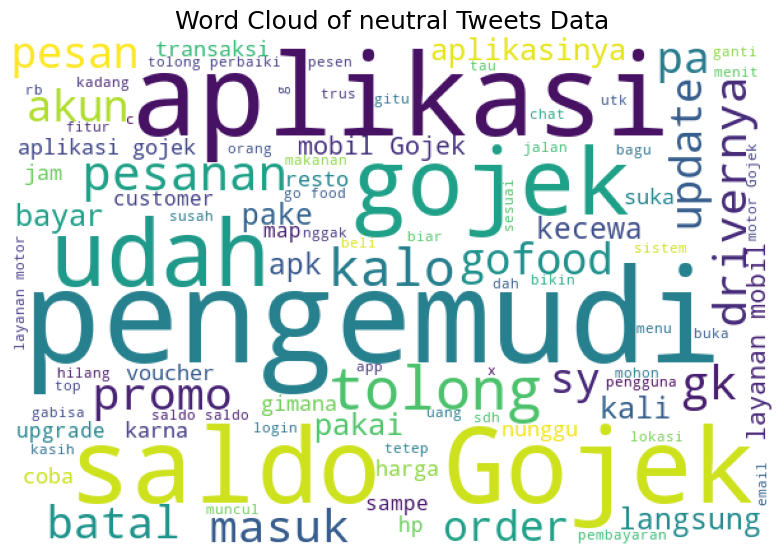

In [114]:
# Menampilkan wordcloud untuk label neutral
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of neutral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

# Modeling

## Data Preparation

In [115]:
# Ambil kolom 'clean_content' sebagai fitur (X) dan 'sentimen' sebagai label (y)
fitur = df['clean_content']
label = df['sentiment'].map({'positive': 2, 'neutral': 1, 'negative': 0})  # Label numerik

## Feature Engineering (Buat Vektorisasi TF-IDF)

In [116]:
# Transformasi teks ke vektor angka menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
fitur_tfidf = tfidf.fit_transform(fitur)

# Menampilkan dimensi data hasil vektorisasi
print("Ringkasan Fitur dan Data:")
print(f"Dimensi fitur TF-IDF: {fitur_tfidf.shape}")

Ringkasan Fitur dan Data:
Dimensi fitur TF-IDF: (30000, 10000)


### 1. Model SVM + TF-IDF (80/20)

In [117]:
# Membagi data fitur dan label menjadi data pelatihan (training) dan pengujian (testing)
X_train, X_test, y_train, y_test = train_test_split(
    fitur_tfidf,       # Data fitur hasil transformasi TF-IDF
    label,             # Label atau target
    test_size=0.2,     # 20% data untuk pengujian, 80% untuk pelatihan
    random_state=42    # Agar hasil split konsisten saat diulang
)

# Menampilkan jumlah sampel pada masing-masing set
print("Jumlah Sampel dalam Dataset:")
print(f"Data pelatihan : {X_train.shape[0]} sampel")
print(f"Data pengujian : {X_test.shape[0]} sampel")

Jumlah Sampel dalam Dataset:
Data pelatihan : 24000 sampel
Data pengujian : 6000 sampel


In [118]:
# Inisialisasi model SVM dengan kernel linear
model_svm = SVC(kernel='linear', probability=True)

# Melatih model pada data pelatihan
model_svm.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred_svm = model_svm.predict(X_test)


Evaluasi Model SVM + TF-IDF
Akurasi Pelatihan : 0.9417
Akurasi Pengujian : 0.8665

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.92      0.86      0.89      1817
      netral       0.74      0.84      0.79      1727
     positif       0.93      0.89      0.91      2456

    accuracy                           0.87      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.87      0.87      0.87      6000



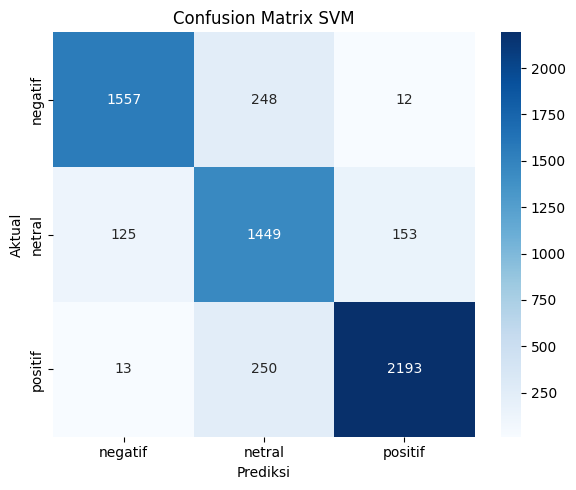

In [119]:
# Evaluasi akurasi model pada data pelatihan dan pengujian
akurasi_latih = accuracy_score(y_train, model_svm.predict(X_train))
akurasi_uji = accuracy_score(y_test, y_pred_svm)

print("\nEvaluasi Model SVM + TF-IDF")
print(f"Akurasi Pelatihan : {akurasi_latih:.4f}")
print(f"Akurasi Pengujian : {akurasi_uji:.4f}")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_svm, target_names=['negatif', 'netral', 'positif']))

# Menampilkan confusion matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.title('Confusion Matrix SVM')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

### 2. Model CNN + TF-IDF (80/20)

In [120]:
# 2. Ubah TF-IDF ke array dense
X_dense = fitur_tfidf.toarray()

In [121]:
# 3. Encode label
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(label)
y_categorical = to_categorical(y_encoded)


In [122]:
# 4. Bagi data untuk CNN
X_train, X_test, y_train, y_test = train_test_split(
    X_dense, y_categorical, test_size=0.2, random_state=42
)

print("Jumlah Sampel dalam Dataset:")
print(f"Data pelatihan : {X_train.shape[0]} sampel")
print(f"Data pengujian : {X_test.shape[0]} sampel")


Jumlah Sampel dalam Dataset:
Data pelatihan : 24000 sampel
Data pengujian : 6000 sampel


In [123]:
# 5. Ubah input untuk Conv1D: (samples, timesteps, features)
X_train_CNN = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_CNN = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [124]:
# 6. Membangun model CNN

# 5. CNN Model
model_CNN = Sequential()
model_CNN.add(Conv1D(128, kernel_size=5, activation='relu', input_shape=(X_train_CNN.shape[1], 1)))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(y_categorical.shape[1], activation='softmax'))

model_CNN.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 6. Training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

riwayat_latihan = model_CNN.fit(
    X_train_CNN, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/20
169/169 - 631s - 4s/step - accuracy: 0.6690 - loss: 0.7226 - val_accuracy: 0.8033 - val_loss: 0.5070
Epoch 2/20
169/169 - 614s - 4s/step - accuracy: 0.8372 - loss: 0.4073 - val_accuracy: 0.8338 - val_loss: 0.4283
Epoch 3/20
169/169 - 593s - 4s/step - accuracy: 0.8955 - loss: 0.2752 - val_accuracy: 0.8438 - val_loss: 0.4061
Epoch 4/20
169/169 - 626s - 4s/step - accuracy: 0.9278 - loss: 0.1991 - val_accuracy: 0.8562 - val_loss: 0.4124
Epoch 5/20
169/169 - 676s - 4s/step - accuracy: 0.9452 - loss: 0.1501 - val_accuracy: 0.8567 - val_loss: 0.4411
Epoch 6/20
169/169 - 593s - 4s/step - accuracy: 0.9575 - loss: 0.1171 - val_accuracy: 0.8500 - val_loss: 0.4640



Evaluasi Model CNN + TF-IDF
Akurasi training per epoch terakhir: 96%
Akurasi testing: 85%
188/188 ━━━━━━━━━━━━━━━━━━━━ 65s 345ms/step

Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      1817
     neutral       0.74      0.76      0.75      1727
    positive       0.91      0.89      0.90      2456

    accuracy                           0.85      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.85      0.85      0.85      6000



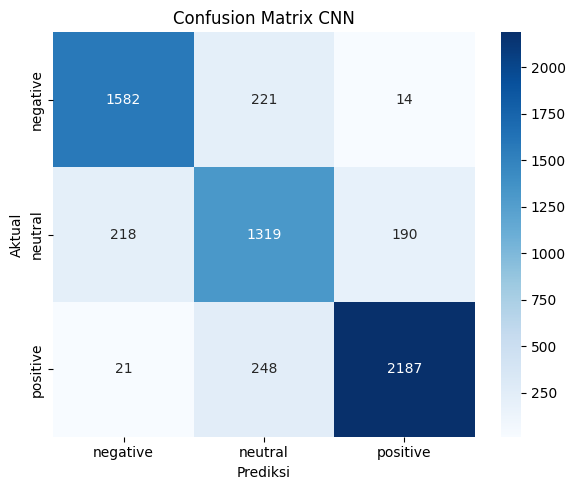

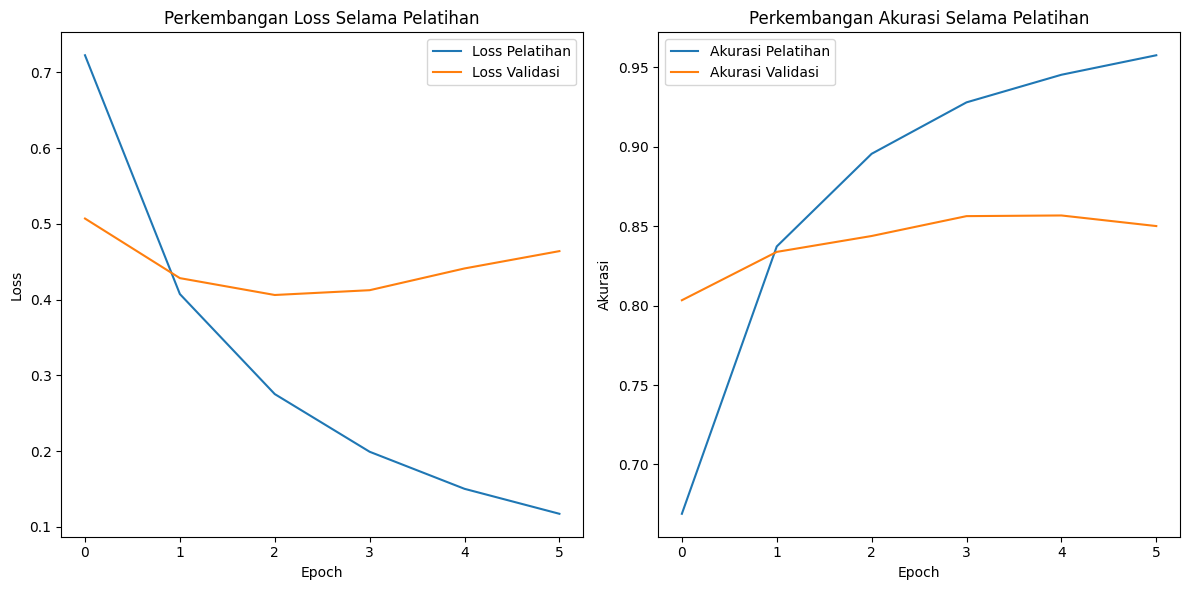

In [125]:
# 7. Evaluasi
akurasi_latih = riwayat_latihan.history['accuracy']
loss_uji, akurasi_uji = model_CNN.evaluate(X_test_CNN, y_test, verbose=0)

# Pembulatan ke atas dalam persen
akurasi_latih_bulat = math.ceil(akurasi_latih[-1] * 100)
akurasi_uji_bulat = math.ceil(akurasi_uji * 100)

print("\nEvaluasi Model CNN + TF-IDF")
print(f"Akurasi training per epoch terakhir: {akurasi_latih_bulat}%")
print(f"Akurasi testing: {akurasi_uji_bulat}%")

# 8. Laporan Klasifikasi
y_pred = np.argmax(model_CNN.predict(X_test_CNN), axis=1)
y_test_label = np.argmax(y_test, axis=1)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test_label, y_pred, target_names=['negative', 'neutral', 'positive']))

# 9. Confusion Matrix
cm = confusion_matrix(y_test_label, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix CNN')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# 10. Visualisasi Loss & Akurasi
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(riwayat_latihan.history['loss'], label='Loss Pelatihan')
plt.plot(riwayat_latihan.history['val_loss'], label='Loss Validasi')
plt.title('Perkembangan Loss Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(riwayat_latihan.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(riwayat_latihan.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perkembangan Akurasi Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

### 3. Model LSTM + Embedding (80/20)

In [126]:
# Menginisialisasi tokenizer dan membatasi jumlah kata unik sebanyak 10.000
tokenizer = Tokenizer(num_words=10000)

# Menyesuaikan tokenizer dengan teks yang telah dibersihkan
tokenizer.fit_on_texts(fitur)

# Mengubah teks menjadi urutan angka berdasarkan kamus tokenizer
fitur_token = tokenizer.texts_to_sequences(fitur)

# Menyamakan panjang urutan dengan padding (maksimal 100 kata)
fitur_input = pad_sequences(fitur_token, maxlen=100)

# Menampilkan informasi dasar
jumlah_kelas = len(np.unique(label))
print(f"Jumlah kelas: {jumlah_kelas}")
print(f"Dimensi urutan fitur: {fitur_input.shape}")
print(f"Ukuran kosa kata: {len(tokenizer.word_index)} kata")


Jumlah kelas: 3
Dimensi urutan fitur: (30000, 100)
Ukuran kosa kata: 42628 kata


In [127]:
X_train, X_test, y_train, y_test = train_test_split(fitur_input, label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

print("\nTotal Sampel:")
print(f"Set pelatihan: {X_train.shape[0]} sampel")
print(f"Set validasi : {X_val.shape[0]} sampel")
print(f"Set pengujian: {X_test.shape[0]} sampel")


Total Sampel:
Set pelatihan: 21000 sampel
Set validasi : 3000 sampel
Set pengujian: 6000 sampel


In [128]:
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    SpatialDropout1D(0.4),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(3, activation='softmax')
])

model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
callbacks = [early_stopping, lr_reduction]

history = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 96s 268ms/step - accuracy: 0.5504 - loss: 0.9082 - val_accuracy: 0.8280 - val_loss: 0.4578 - learning_rate: 0.0010
Epoch 2/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 86s 262ms/step - accuracy: 0.8502 - loss: 0.3938 - val_accuracy: 0.8950 - val_loss: 0.2970 - learning_rate: 0.0010
Epoch 3/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 82s 248ms/step - accuracy: 0.9127 - loss: 0.2362 - val_accuracy: 0.9153 - val_loss: 0.2480 - learning_rate: 0.0010
Epoch 4/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 64s 195ms/step - accuracy: 0.9448 - loss: 0.1593 - val_accuracy: 0.9197 - val_loss: 0.2574 - learning_rate: 0.0010
Epoch 5/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 69s 209ms/step - accuracy: 0.9615 - loss: 0.1103 - val_accuracy: 0.9313 - val_loss: 0.2235 - learning_rate: 0.0010
Epoch 6/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 66s 201ms/step - accuracy: 0.9706 - loss: 0.0865 - val_accuracy: 0.9400 - val_loss: 0.2043 - learning_rate: 0.0010
Epoch 7/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 67s 205ms/step - accuracy: 0.9

In [129]:
train_acc = history.history['accuracy'][-1]
loss_test, acc_test = model_lstm.evaluate(X_test, y_test)

print("\nEvaluasi Model LSTM")
print(f"Akurasi pelatihan per epoch terakhir: {train_acc:.4f}")
print(f"Akurasi pengujian akhir: {acc_test:.4f}")

y_pred = np.argmax(model_lstm.predict(X_test), axis=1)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))



188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9369 - loss: 0.1921

Evaluasi Model LSTM
Akurasi pelatihan per epoch terakhir: 0.9845
Akurasi pengujian akhir: 0.9392
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step

Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.95      0.95      0.95      1817
     neutral       0.88      0.92      0.90      1727
    positive       0.98      0.94      0.96      2456

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



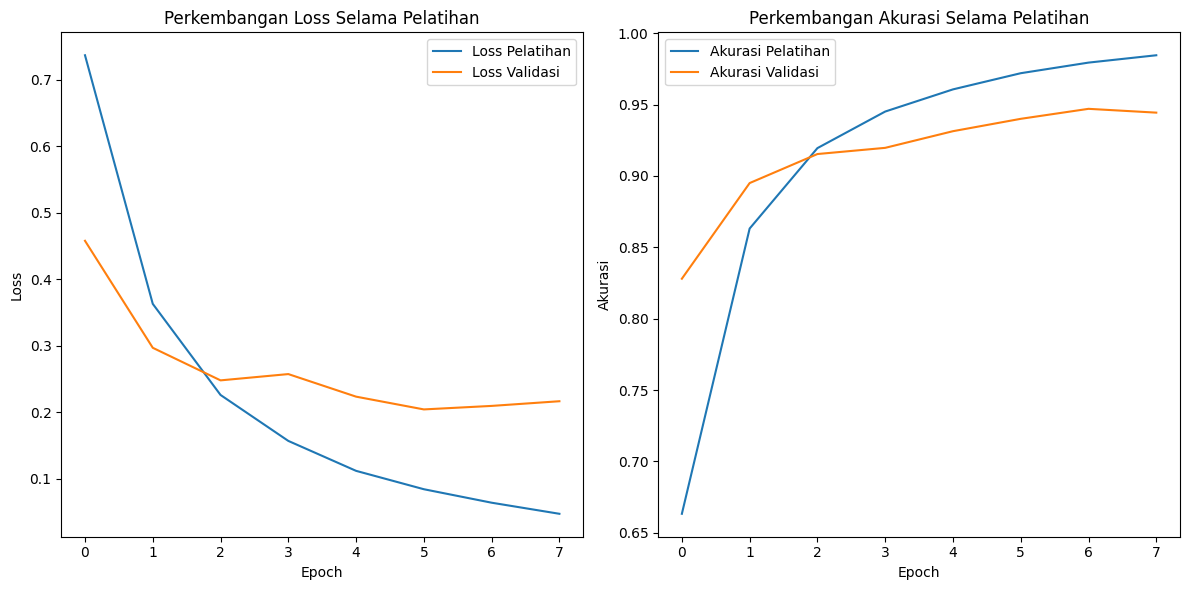

In [130]:
plt.figure(figsize=(12, 6))

# Visualisasi Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Perkembangan Loss Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualisasi Akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perkembangan Akurasi Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

### 4. Model GRU + Embedding (70/30)

In [131]:
# Tokenisasi dan padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(fitur)
fitur_token = tokenizer.texts_to_sequences(fitur)
fitur_padat = pad_sequences(fitur_token, maxlen=100)

In [132]:
# Split 70/30 (pelatihan/pengujian)
fitur_latih_gru, fitur_uji_gru, label_latih_gru, label_uji_gru = train_test_split(
    fitur_padat, label, test_size=0.3, random_state=42)

# Split validasi dari data latih (10% dari data latih)
fitur_latih_gru, fitur_validasi_gru, label_latih_gru, label_validasi_gru = train_test_split(
    fitur_latih_gru, label_latih_gru, test_size=0.125, random_state=42)

print("\nTotal Sampel (GRU):")
print(f"Set pelatihan : {fitur_latih_gru.shape[0]} sampel")
print(f"Set validasi  : {fitur_validasi_gru.shape[0]} sampel")
print(f"Set pengujian : {fitur_uji_gru.shape[0]} sampel")


Total Sampel (GRU):
Set pelatihan : 18375 sampel
Set validasi  : 2625 sampel
Set pengujian : 9000 sampel


In [133]:
# Model GRU
model_gru = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    SpatialDropout1D(0.4),
    GRU(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model_gru.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Callbacks
callbacks_gru = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

# Training
riwayat_gru = model_gru.fit(
    fitur_latih_gru, label_latih_gru,
    validation_data=(fitur_validasi_gru, label_validasi_gru),
    epochs=20,
    batch_size=64,
    verbose=1,
    callbacks=callbacks_gru
)


Epoch 1/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 72s 232ms/step - accuracy: 0.5147 - loss: 0.9467 - val_accuracy: 0.8072 - val_loss: 0.4756 - learning_rate: 0.0010
Epoch 2/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 65s 227ms/step - accuracy: 0.8391 - loss: 0.3973 - val_accuracy: 0.8960 - val_loss: 0.2935 - learning_rate: 0.0010
Epoch 3/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 62s 214ms/step - accuracy: 0.9102 - loss: 0.2365 - val_accuracy: 0.9147 - val_loss: 0.2312 - learning_rate: 0.0010
Epoch 4/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 63s 220ms/step - accuracy: 0.9445 - loss: 0.1498 - val_accuracy: 0.9364 - val_loss: 0.1830 - learning_rate: 0.0010
Epoch 5/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 64s 221ms/step - accuracy: 0.9640 - loss: 0.0978 - val_accuracy: 0.9265 - val_loss: 0.2100 - learning_rate: 0.0010
Epoch 6/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 63s 220ms/step - accuracy: 0.9732 - loss: 0.0782 - val_accuracy: 0.9425 - val_loss: 0.1942 - learning_rate: 0.0010
Epoch 7/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 63s 219ms/step - accuracy: 0.9

282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9347 - loss: 0.1869

Evaluasi Model GRU:
Akurasi pelatihan terakhir : 0.9831
Akurasi pengujian akhir    : 0.9347
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step

Laporan Klasifikasi GRU:
              precision    recall  f1-score   support

     negatif       0.96      0.94      0.95      2760
      netral       0.88      0.91      0.89      2564
     positif       0.96      0.95      0.96      3676

    accuracy                           0.93      9000
   macro avg       0.93      0.93      0.93      9000
weighted avg       0.94      0.93      0.93      9000



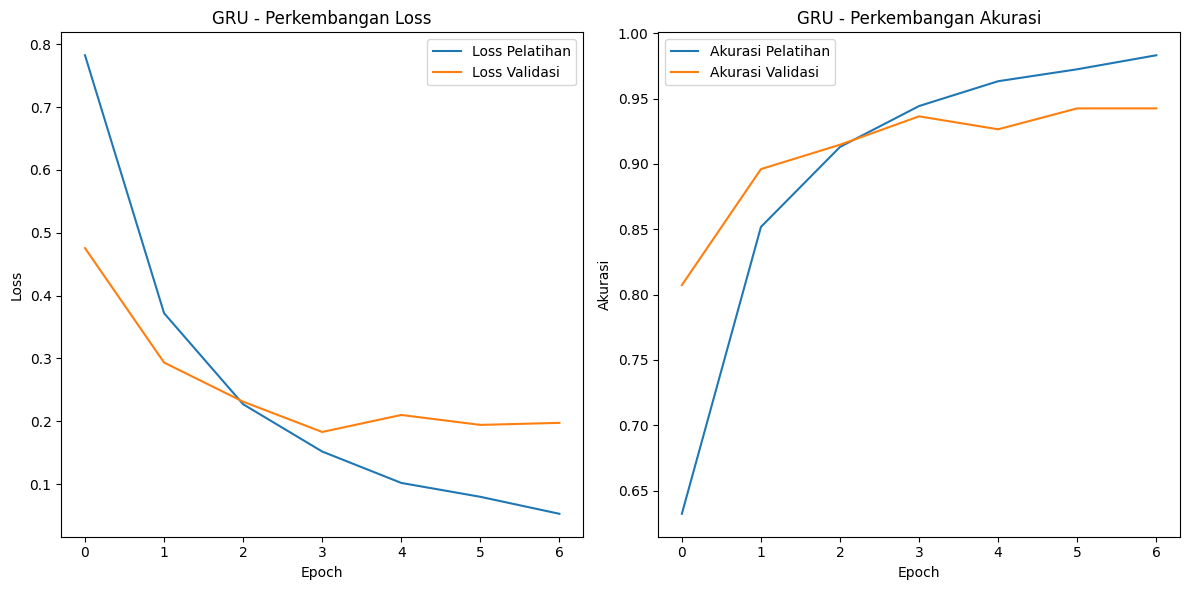

In [134]:
# Evaluasi
akurasi_latih_gru = riwayat_gru.history['accuracy'][-1]
kerugian_uji_gru, akurasi_uji_gru = model_gru.evaluate(fitur_uji_gru, label_uji_gru)

print("\nEvaluasi Model GRU:")
print(f"Akurasi pelatihan terakhir : {akurasi_latih_gru:.4f}")
print(f"Akurasi pengujian akhir    : {akurasi_uji_gru:.4f}")

# Prediksi dan laporan
y_pred_gru = np.argmax(model_gru.predict(fitur_uji_gru), axis=1)
print("\nLaporan Klasifikasi GRU:")
print(classification_report(label_uji_gru, y_pred_gru, target_names=['negatif', 'netral', 'positif']))

# Visualisasi
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(riwayat_gru.history['loss'], label='Loss Pelatihan')
plt.plot(riwayat_gru.history['val_loss'], label='Loss Validasi')
plt.title('GRU - Perkembangan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Akurasi
plt.subplot(1, 2, 2)
plt.plot(riwayat_gru.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(riwayat_gru.history['val_accuracy'], label='Akurasi Validasi')
plt.title('GRU - Perkembangan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

### Penyimpanan Model yang dilakukan 

In [138]:
# === SIMPAN MODEL SVM ===
with open("./Models/svm_sentiment_model.pkl", "wb") as f:
    pickle.dump(model_svm, f)

# === SIMPAN TF-IDF VECTORIZEr (untuk SVM dan CNN) ===
with open("./Models/vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# === SIMPAN TOKENIZER (untuk LSTM dan GRU) ===
with open("./Models/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# === SIMPAN MODEL CNN ===
model_CNN.save("./Models/cnn_sentiment_model.h5")

# === SIMPAN MODEL LSTM ===
model_lstm.save("./Models/lstm_sentiment_model.h5")

# === SIMPAN MODEL GRU ===
model_gru.save("./Models/gru_sentiment_model.h5")

# Evaluasi

##  **Evaluasi Model Sentiment Analysis Gojek Review**

| Model | Data Split | Akurasi Training | Akurasi Testing |
|-------|------------|------------------|-----------------|
| **SVM + TF-IDF** | 80/20 | 94.17% | 86.65% |
| **CNN + TF-IDF** | 80/20 | 96% | 85% |
| **LSTM + Embedding** | 80/20 | 98.45% | 93.92% |
| **GRU + Embedding** | 70/30 | 98.31% | 93.47% |

---

# Inference (Testing Model) 

In [142]:
# === LOAD MODEL & OBJEK YANG DISIMPAN ===
with open("./Models/svm_sentiment_model.pkl", "rb") as f:
    model_svm = pickle.load(f)

with open("./Models/vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

with open("./Models/tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Load models LSTM, GRU, CNN
model_LSTM = load_model("./Models/lstm_sentiment_model.h5")
model_GRU = load_model("./Models/gru_sentiment_model.h5")
model_CNN = load_model("./Models/cnn_sentiment_model.h5")


In [153]:
# === DATA BARU UNTUK DIPREDIKSI ===
new_texts = [
    "Sangat suka menggunakan Gojek, pelayanan cepat, driver ramah, dan sering ada promo menarik. Harapannya ke depan makin banyak fitur baru yang memudahkan.",
    "Order saya dibatalkan, sangat kecewa",
    "Semoga bisa diperbaiki ke depannya."
]

true_labels = ["positive", "negative", "neutral"]

# === PREPROCESSING UNTUK LSTM, GRU, CNN ===
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=100)  # pastikan maxlen sesuai

# === PREPROCESSING UNTUK SVM DAN CNN ===
new_tfidf = vectorizer.transform(new_texts)

# === PREDIKSI ===
predictions_LSTM = model_LSTM.predict(new_padded_sequences)
predictions_GRU = model_GRU.predict(new_padded_sequences)
predictions_CNN = model_CNN.predict(new_tfidf)  # CNN pakai TF-IDF
predictions_SVM = model_svm.predict(new_tfidf)  # SVM pakai TF-IDF

# === KONVERSI LABEL NUMERIK KE STRING ===
label_map = {0: "negative", 1: "neutral", 2: "positive"}

predicted_labels_LSTM = [label_map[np.argmax(p)] for p in predictions_LSTM]
predicted_labels_GRU = [label_map[np.argmax(p)] for p in predictions_GRU]
predicted_labels_CNN = [label_map[np.argmax(p)] for p in predictions_CNN]
predicted_labels_SVM = [label_map[p] for p in predictions_SVM]

# === CETAK HASIL PREDIKSI ===
print("\nSentiment Prediction Results:")
for i, text in enumerate(new_texts):
    print(f"\nText: {text}")
    print(f"True Label           : {true_labels[i]}")
    print(f"LSTM Prediction      : {predicted_labels_LSTM[i]}")
    print(f"GRU Prediction       : {predicted_labels_GRU[i]}")
    print(f"CNN Prediction       : {predicted_labels_CNN[i]}")
    print(f"SVM Prediction       : {predicted_labels_SVM[i]}")
    print("-" * 60)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

Sentiment Prediction Results:

Text: Sangat suka menggunakan Gojek, pelayanan cepat, driver ramah, dan sering ada promo menarik. Harapannya ke depan makin banyak fitur baru yang memudahkan.
True Label           : positive
LSTM Prediction      : positive
GRU Prediction       : positive
CNN Prediction       : positive
SVM Prediction       : positive
------------------------------------------------------------

Text: Order saya dibatalkan, sangat kecewa
True Label           : negative
LSTM Prediction      : negative
GRU Prediction       : negative
CNN Prediction       : negative
SVM Prediction       : negative
------------------------------------------------------------

Text: Semoga bisa diperbaiki ke depannya.
True Label           : neutral
LSTM Prediction      : neutral
GRU Prediction       : neutral
CNN Prediction       : positive
SVM Prediction       : neutral
-------

# Evaluasi Keseluruhan 


## **Evaluasi Lengkap dan Kesimpulan Analisis Sentiment Analysis pada Review Gojek**

---

## **Evaluasi Model**

| Model | Metode | Split Data | Akurasi Training | Akurasi Testing | Prediksi Real |
|-------|--------|------------|------------------|------------------|----------------|
| **SVM** | TF-IDF + SVM | 80/20 | 94.17% | 86.65% | **3 benar** |
| **CNN** | TF-IDF + CNN | 80/20 | 96% | 85% | 2 benar, 1 salah (**neutral → positive**) |
| **LSTM** | Embedding + LSTM | 80/20 | 98.45% | 93.92% | **3 benar** |
| **GRU** | Embedding + GRU | 70/30 | 98.31% | 93.47% | **3 benar** |

---

## **Analisis Hasil Prediksi**

### Contoh 1  
**Teks**: *"Sangat suka menggunakan Gojek..."*  
**Label Asli**: **Positive**  
**Prediksi**: Semua model memprediksi **positive** ✅

### Contoh 2  
**Teks**: *"Order saya dibatalkan, sangat kecewa"*  
**Label Asli**: **Negative**  
**Prediksi**: Semua model memprediksi **negative** ✅

### Contoh 3  
**Teks**: *"Semoga bisa diperbaiki ke depannya."*  
**Label Asli**: **Neutral**  
✅ **LSTM**, **GRU**, dan **SVM** memprediksi **neutral**  
❌ **CNN** memprediksi **positive**

---

## **Kesimpulan Analisis**

1. **Model terbaik secara keseluruhan adalah LSTM**, karena memiliki akurasi pengujian tertinggi (93.92%) dan memprediksi semua data uji secara akurat. Kemampuannya dalam memahami urutan kata menjadikannya unggul untuk teks yang kompleks atau bernuansa.

2. **GRU menjadi alternatif efisien**, dengan hasil yang sangat kompetitif meskipun menggunakan porsi data latih lebih kecil (70%). Cocok jika ingin efisiensi tanpa banyak kompromi pada akurasi.

3. **SVM menunjukkan kestabilan**, terutama dalam menangani data pendek. Cocok digunakan sebagai baseline model klasik yang cepat dan ringan.

4. **CNN masih butuh peningkatan**, terutama pada prediksi kalimat netral yang rawan tertukar dengan positif. Hal ini mungkin karena CNN tidak sekuat LSTM/GRU dalam menangkap konteks menyeluruh.

---

## **Rekomendasi**

- Gunakan **LSTM sebagai model utama untuk deployment**, terutama untuk teks panjang atau kalimat bernuansa.
- Pertimbangkan **GRU** untuk sistem real-time dengan keterbatasan sumber daya.
- Simpan **SVM sebagai baseline** untuk prototipe cepat.
- Tingkatkan **CNN** dengan pendekatan embedding atau penambahan attention mechanism.

---



In [155]:
!pip freeze requirements.txt

Note: you may need to restart the kernel to use updated packages.
